In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df_train = pd.read_csv("data/raw/poetry_data_train.zip")
df_test = pd.read_csv("data/raw/poetry_data_test.zip")
df_train

,url,rating,views,output_text,genre
0,https://www.chitalnya.ru/work/3180020/,29,33,Люблю ли осень? Ты спроси у ели -\nОна в колюч...,лирика
1,https://www.chitalnya.ru/work/2496512/,0,29,Подруга - злая похмелюга\nУжасно вредная порой...,юмор
2,https://www.chitalnya.ru/work/2300891/,73,110,На качелях настроенья\nМы сегодня улетели\nВ р...,лирика
3,https://www.chitalnya.ru/work/3109869/,44,67,"Знаешь, Света, с тобой мне просто:\nУ тебя жив...",лирика
4,https://www.chitalnya.ru/work/3382840/,0,12,"Клянемся, будем помнить погибших мы всегда,\nИ...",лирика
...,...,...,...,...,...
138391,https://www.chitalnya.ru/work/1153818/,0,136,Как трудно мне определиться -\nЧервяк я в жизн...,юмор
138392,https://www.chitalnya.ru/work/2873976/,74,84,"Осенний дождь... Холодный. Хмурый.\nСтучит, ст...",лирика
138393,https://www.chitalnya.ru/work/3140150/,0,10,"Ничто не проходит бесследно и даром\nНичто, ни...",лирика
138394,https://www.chitalnya.ru/work/2433508/,30,88,"Я предам тебя сейчас,\nКину в радости и в горе...",лирика


In [ ]:
df_train["rating"].mean()

11.92026503656175

In [ ]:
df_train["views"].mean()

132.44228879447382

In [ ]:
df_train["rating"] / df_train["views"]

0         0.878788
1         0.000000
2         0.663636
3         0.656716
4         0.000000
            ...   
138391    0.000000
138392    0.880952
138393    0.000000
138394    0.340909
138395    0.004484
Length: 138396, dtype: float64

In [ ]:
df_train["rating"].value_counts()

rating
0      77985
7       9315
2       7425
1       5090
9       2771
       ...  
318        1
398        1
334        1
386        1
851        1
Name: count, Length: 440, dtype: int64

In [ ]:
df_train["rating"].mean()

11.92026503656175

In [ ]:
df_train["rating"].max(0)

851

In [ ]:
df_train[df_train["rating"] == df_train["rating"].max()]

,url,rating,views,output_text,genre
134881,https://www.chitalnya.ru/work/1670945/,851,1315,"На ладони моей непутёвая линия жизни,\nТо под ...",песни


<Axes: >

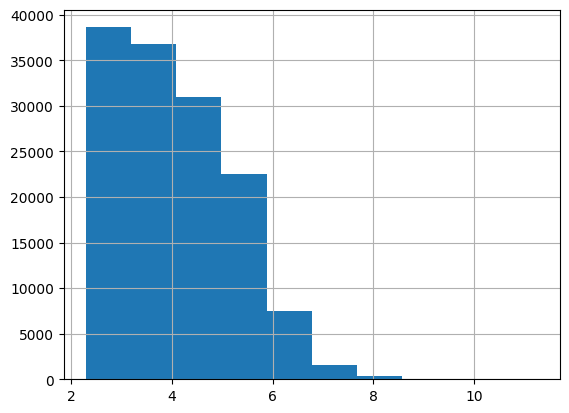

In [ ]:
df_train["views"].apply(np.log).hist()

<Axes: >

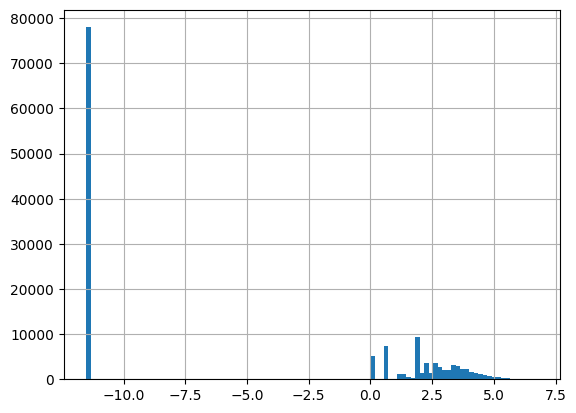

In [ ]:
df_train["rating"].apply(lambda x: np.log(x + 0.00001)).hist(bins=100)

In [ ]:
df_train[df_train["rating"] > df_train["views"]]

,url,rating,views,output_text,genre
9,https://www.chitalnya.ru/work/3841458/,58,16,"Чавкает лужа смешно под ногами:\nСэр, можно мн...",юмор
15,https://www.chitalnya.ru/work/3275893/,58,26,"Свод законов небесный,\nСнегопады, дожди.\nОт ...",лирика
89,https://www.chitalnya.ru/work/3439058/,73,72,"Выцветают чернила новеллы потерянной ночи,\nНа...",лирика
178,https://www.chitalnya.ru/work/3773168/,32,20,Завтра начинается вчера\nБоги существуют понар...,эзотерика
204,https://www.chitalnya.ru/work/3375714/,39,17,"Мы к берегу пологому причалим,\nОглянемся наза...",лирика
...,...,...,...,...,...
138284,https://www.chitalnya.ru/work/3800370/,48,34,"А, вот сегодняшний денёк:\nЯгуша всех достала!...",юмор
138334,https://www.chitalnya.ru/work/3694518/,82,44,"Мне знакомы, до боли знакомы\nВсе тропинки дер...",лирика
138343,https://www.chitalnya.ru/work/3720299/,45,20,Если хочешь..-А если нет?\nНе нужны пустые сло...,лирика
138357,https://www.chitalnya.ru/work/3011493/,47,40,"О чём грустят московские сосульки?\nО том, что...",песни


<Axes: >

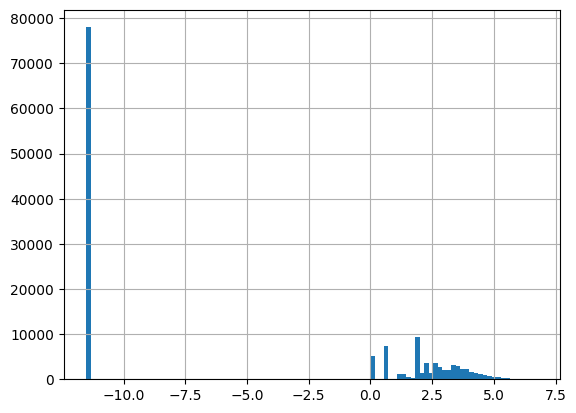

In [ ]:
df_train["rating"].apply(lambda x: np.log(x + 0.00001)).hist(bins=100)

In [ ]:
df_train["views"].hist()

In [ ]:
df_train["genre"].value_counts()

In [ ]:
sns.relplot(
    data=df_train[(df_train.rating <= 100) & (df_train.views <= 5000)],
    x="rating",
    y="views",
    hue="genre",
    height=15,
)

In [ ]:
sns.catplot(data=df_train, x="rating", y="genre", hue="views", height=10)